In [1]:
#|default_exp app

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gradio Pets

### Imports iniciais

In [3]:
! pip install gradio
! pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
 

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

### Visualizando imagem

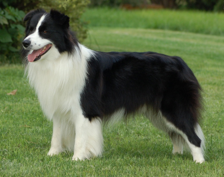

In [5]:
im = PILImage.create('/content/drive/MyDrive/Colab Notebooks/collie.jpg')
im.thumbnail((224,224))
im

### Carregando o modelo treinado previamente

In [6]:
#export
learn = load_learner('/content/drive/MyDrive/Colab Notebooks/model.pkl')

In [7]:
learn.predict(im)

('samoyed',
 tensor(31),
 tensor([2.0111e-02, 3.2378e-03, 3.7778e-03, 2.2476e-03, 1.1338e-04, 3.6943e-03,
         1.3554e-02, 1.6673e-03, 4.8603e-02, 7.4151e-04, 2.5233e-03, 4.4053e-04,
         2.4886e-03, 1.2408e-01, 2.7532e-02, 8.4739e-04, 3.1083e-03, 1.4153e-02,
         2.8213e-03, 5.5501e-02, 3.1484e-03, 1.9290e-02, 9.4872e-03, 3.0614e-02,
         3.8594e-02, 7.8924e-03, 3.5901e-04, 1.3792e-03, 1.8170e-01, 7.8158e-04,
         2.4483e-02, 2.7493e-01, 3.7688e-04, 6.8459e-02, 2.9758e-03, 1.3302e-04,
         4.1622e-03]))

In [8]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [9]:
classify_image(im)

{'Abyssinian': 0.02011123113334179,
 'Bengal': 0.0032378395553678274,
 'Birman': 0.0037778010591864586,
 'Bombay': 0.002247585216537118,
 'British_Shorthair': 0.00011338413605699316,
 'Egyptian_Mau': 0.003694299142807722,
 'Maine_Coon': 0.01355352345854044,
 'Persian': 0.0016672612400725484,
 'Ragdoll': 0.048602644354104996,
 'Russian_Blue': 0.0007415058207698166,
 'Siamese': 0.0025233167689293623,
 'Sphynx': 0.0004405336803756654,
 'american_bulldog': 0.002488551428541541,
 'american_pit_bull_terrier': 0.12407612055540085,
 'basset_hound': 0.027531584724783897,
 'beagle': 0.0008473925408907235,
 'boxer': 0.0031083303038030863,
 'chihuahua': 0.01415321696549654,
 'english_cocker_spaniel': 0.0028212510515004396,
 'english_setter': 0.05550061911344528,
 'german_shorthaired': 0.003148413961753249,
 'great_pyrenees': 0.01929004304111004,
 'havanese': 0.009487220086157322,
 'japanese_chin': 0.03061426617205143,
 'keeshond': 0.03859364613890648,
 'leonberger': 0.00789235532283783,
 'miniatur

In [10]:
#export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['/content/drive/MyDrive/Colab Notebooks/collie.jpg']

<ipython-input-10-cec20c7be4e7>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(192, 192))
<ipython-input-10-cec20c7be4e7>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(192, 192))
<ipython-input-10-cec20c7be4e7>:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label()
<ipython-input-10-cec20c7be4e7>:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label()


In [11]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


In [12]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [13]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2543e+00,  1.9191e+00,  1.2199e+00,  1.0391e+00, -1.3078e-03,
          7.6617e-01,  8.8711e-01,  1.6314e+00,  7.0503e-01,  3.2883e+00,
          7.8523e-01, -7.7787e-04,  1.0003e+00, -2.7744e-03,  3.2982e+00,
         -8.4448e-04,  1.9847e+00,  1.0209e+00,  4.4537e+00,  2.5544e-01,
          2.7246e+00,  9.2556e-01,  1.2360e+00,  3.6494e-03,  1.7874e+00,
          5.4370e-01,  4.6277e+00,  1.2109e-02,  5.6675e-04,  3.4510e+00,
          1.3511e+00,  4.1273e+00,  2.6879e+00,  4.1206e+00,  3.4020e+00,
          8.5099e-01,  7.3663e-01,  3.9803e+00,  1.2854e+00,  6.4181e-01,
          2.6900e+00,  1.1179e+00,  1.1689e+00,  5.5502e-01,  2.3352e+00,
         -2.3020e-04,  9.6765e-01,  1.0829e-03,  1.1989e+00,  1.7890e+00,
          4.0141e-01,  4.4967e-01,  9.7079e-01,  3.9895e+00,  6.5887e-01,
          6.8768e-01,  9.8544e-01,  2.7056e+00,  1.2168e+00,  7.6242e-01,
          3.3005e+00,  1.6200e+00,  9.5588e-01,  2.1212e+00,  6.3008e-01,
          4.033

In [14]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 0.0228, -0.0015,  0.0404,  ...,  0.0018, -0.0453,  0.0081],
         [-0.1439,  0.0166,  0.0259,  ...,  0.0126, -0.1044,  0.0563],
         [-0.0654, -0.0327,  0.0057,  ..., -0.0416,  0.0660, -0.0403],
         ...,
         [-0.0088,  0.0698,  0.0002,  ...,  0.0040,  0.0413, -0.0193],
         [ 0.0020,  0.0322,  0.0298,  ..., -0.0297, -0.0302,  0.0556],
         [ 0.1211, -0.0356, -0.0045,  ..., -0.0063,  0.0238, -0.0115]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.4048, -0.7419, -0.4235, -0.1651, -0.3026, -0.1899, -0.5534, -0.6272,
         -0.3007, -0.4253, -0.5995, -0.4106, -0.2174, -1.7935, -0.3170, -0.1163,
         -0.4482, -0.2847, -0.4343, -0.4945, -0.4064, -1.1401, -0.6753, -1.7237,
         -0.2954, -0.2655, -0.2187, -0.3914, -0.4150, -0.4771,  0.2365, -0.7541,
         -0.5851, -0.1819, -1.5272, -0.3624, -2.4689, -2.3460, -0.6109, -0.4113,
         -0.6963, -0.5764, -0.5877, -0.0319, -2.0354, -0.2859, -0.3953, -0.8403